In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### 주성분 분석(PCA: Principal Componet Analysis)
- 고차원의 데이터를 저차원의 데이터로 환원시키는 기법

In [2]:
fruits = np.load('../Data/fruits.npy')
fruits.shape

(300, 100, 100)

In [3]:
# 2차원 배열
fruits_2d = fruits.reshape(-1,100*100)
fruits_2d.shape

(300, 10000)

---
### PCA Model 구성하기

In [4]:
from sklearn.decomposition import PCA

In [5]:
pca = PCA(n_components=50) #  n_components : 300개의 데이터중 구별이 확실한 주성분 50개를 선택하겠다. 알아서 확실한 녀석을 50개 찾음
pca.fit(fruits_2d)

PCA(n_components=50)

In [6]:
pca.components_.shape
# 50개를 지정했기 때무넹 50,10000이 나옴.

(50, 10000)

In [7]:
# 함수 재활용 

def draw_fruits(arr, ratio=1): # ratio : 해상도 크기
    n = len(arr) # n : sample 갯수
    # 한 줄에 10개씩 이미지를 그린다. sample 갯수를 10으로 나누어 전체 행 갯수를 계산
    rows = int(np.ceil(n/10))
    # 행이 1개 이며 열 갯수는 sample 갯수이고, 그렇지 않으면 10개 이다.
    cols = n if rows< 2 else 10
    fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)

    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:
                axs[i,j].imshow(arr[i*10+j], cmap='gray_r')
            axs[i,j].axis('off') # xy 좌표? 가 불필요해서 off
    plt.show()

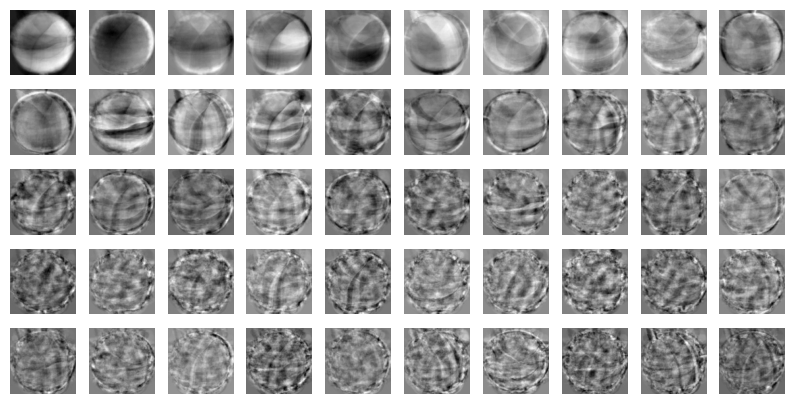

In [8]:
draw_fruits(pca.components_.reshape(-1,100,100))
# 잘 모르겠지만 이녀석들이 가장 구분이 잘 되는 50개라 함 

In [11]:
# 행의 갯수는 원본과 동일하게 하고 Feature의 특성을 50개의 주성분으로 변경하기 
print(fruits_2d.shape) # = (300,10000)
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape) # = (300, 50)


(300, 10000)
(300, 50)


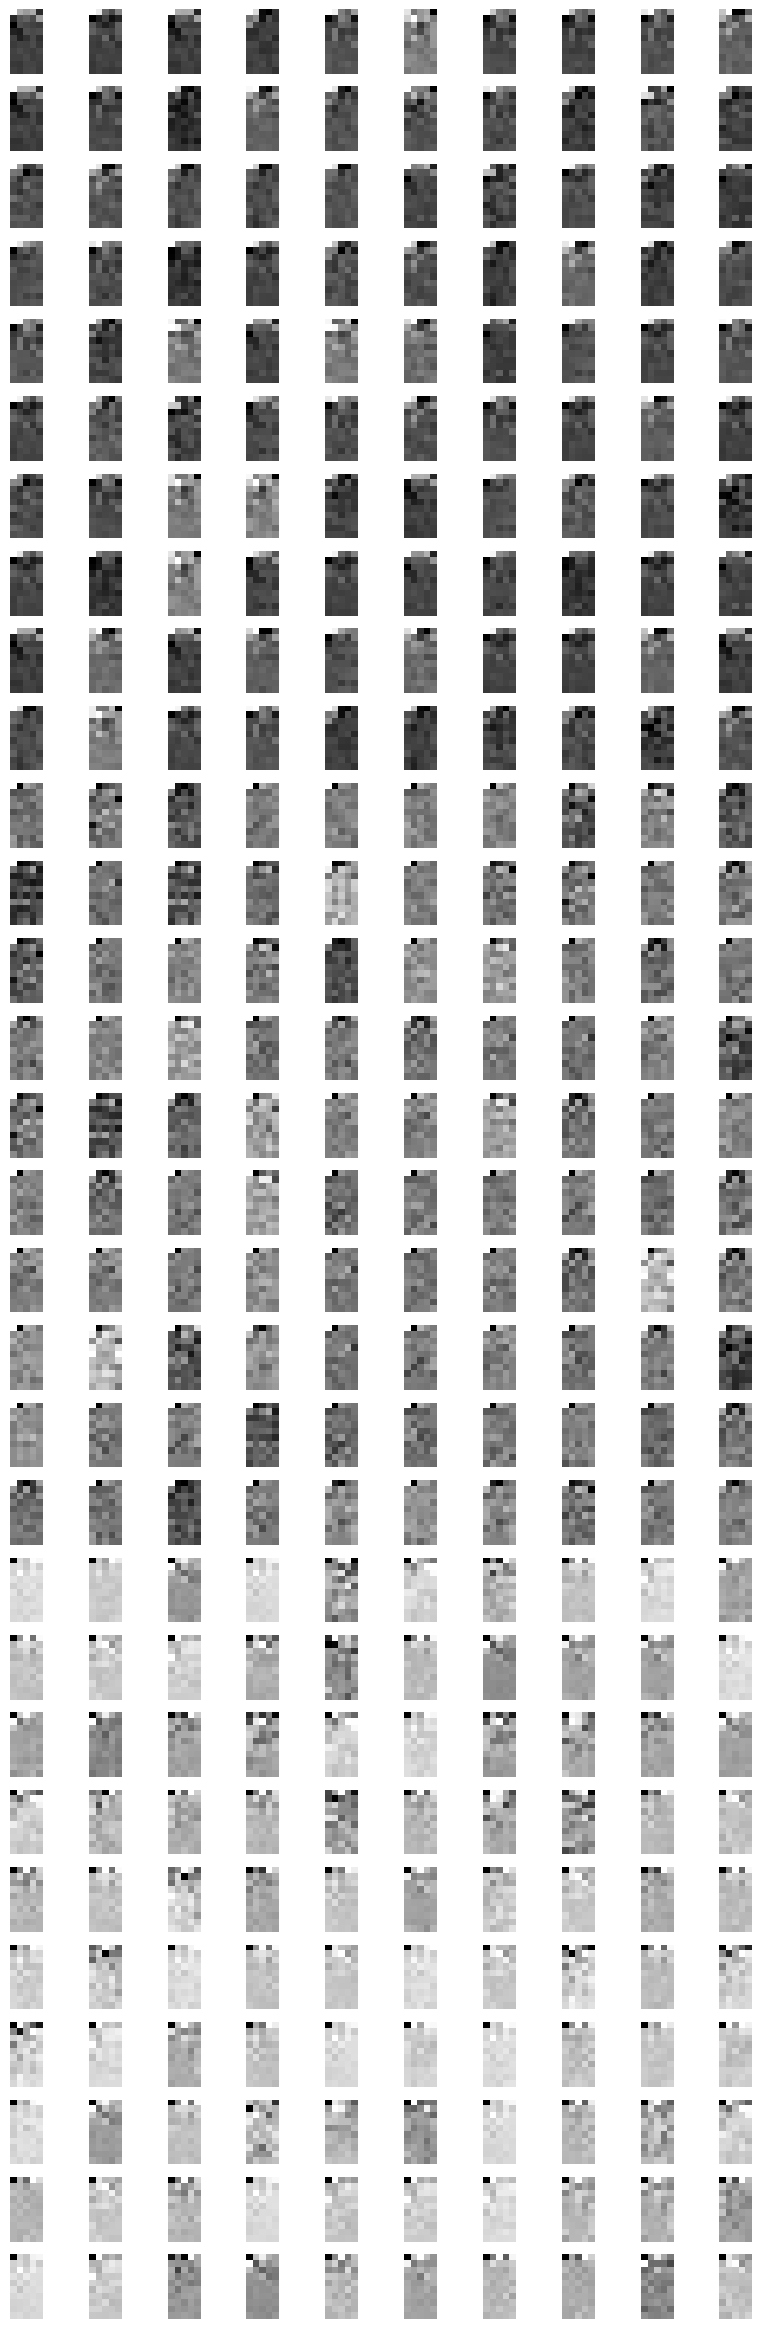

In [13]:
draw_fruits(fruits_pca.reshape(-1,10,5)) # 애가 제일 중요한 그림임

위에 이미지가 주요 포인트 라 함 


---
### 원본 데이터 재구성

In [14]:
fruits_inverse = pca.inverse_transform(fruits_pca)
fruits_inverse.shape # = (300, 10000)

(300, 10000)

In [15]:
# 그림을 그리기 위해 2차원 확장
fruits_reconstruct = fruits_inverse.reshape(-1,100,100)
fruits_reconstruct.shape # = (300, 100, 100)

(300, 100, 100)

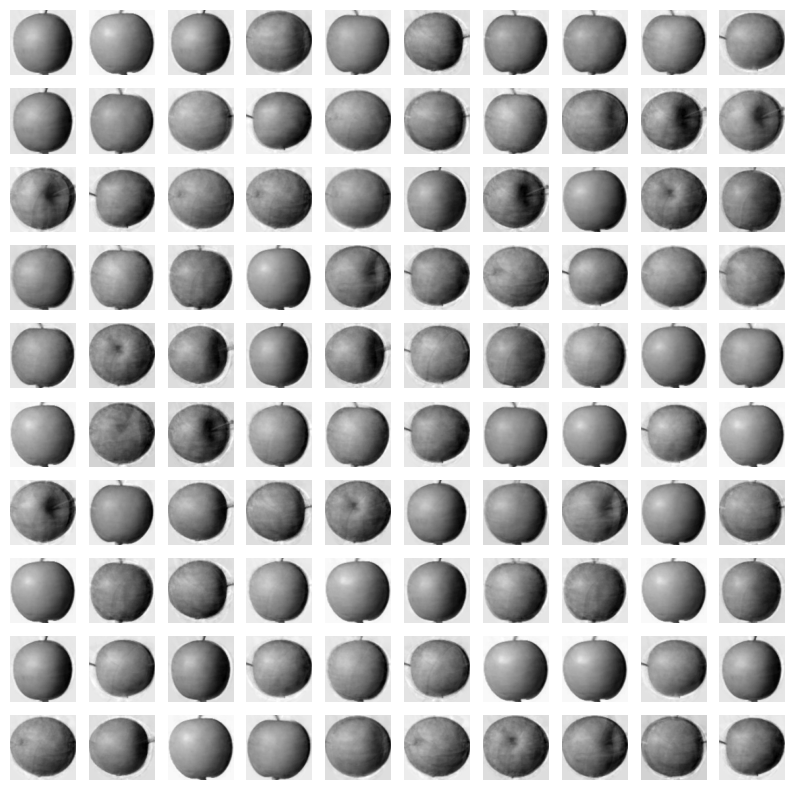

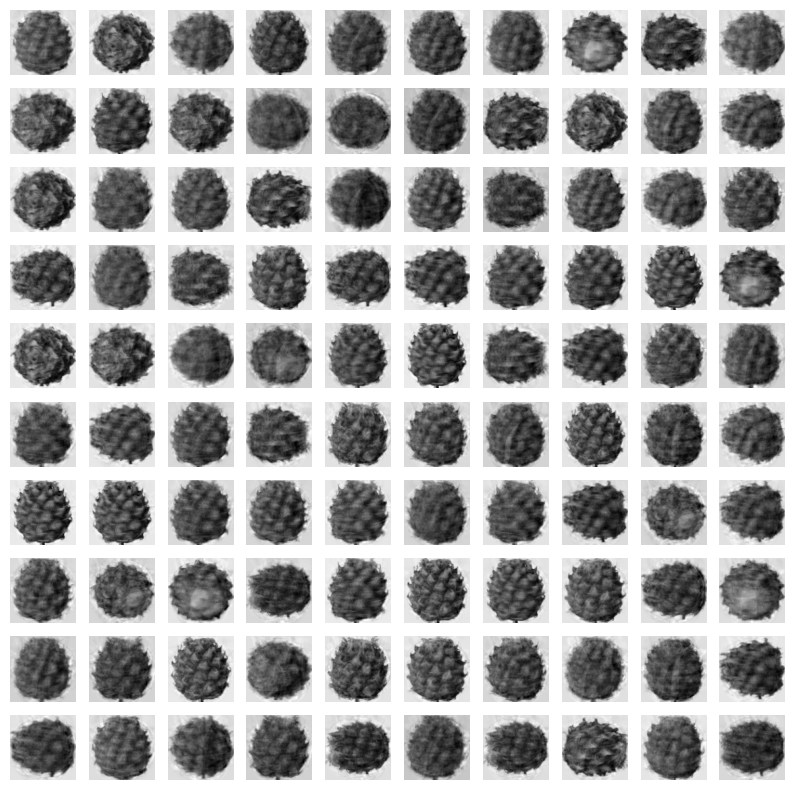

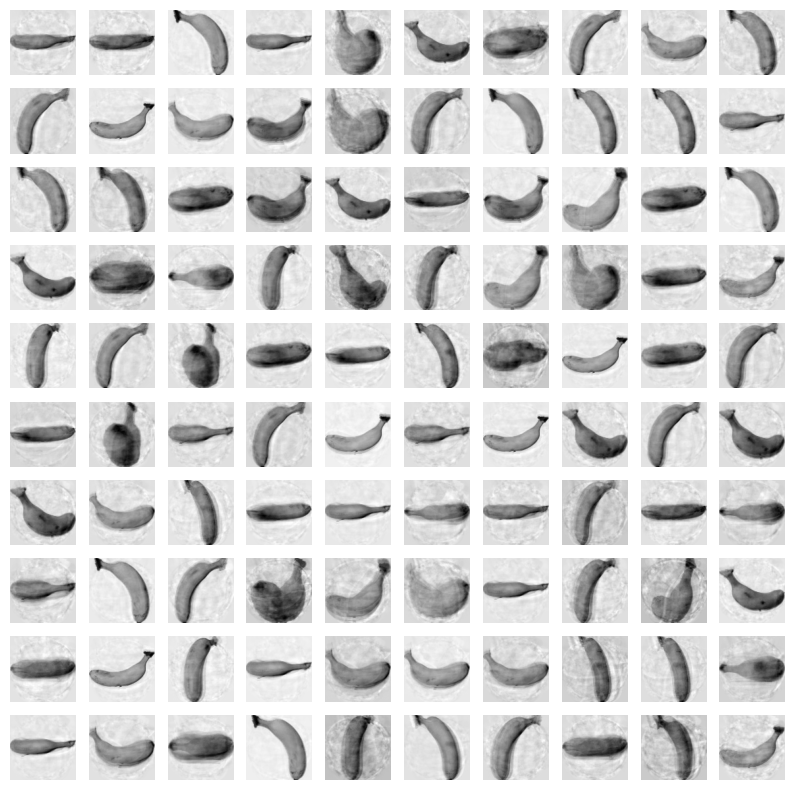

In [26]:
# 정말로 특성만으로 되나? 일단 3개 0,100,200 인걸 알고 있으니까 확인
for start in [0,100,200]:
    draw_fruits(fruits_reconstruct[start:start+100])

1/20의 데이터 특성만 가지고도 전반적ㄱ으로 배경은 깨끗하지 않으나 물체의 구분은 가능하다.

In [17]:
# 복원 능력
np.sum(pca.explained_variance_ratio_)

# 50개의 주성분ㅇ로 약 92% 의 복원이 가능하다 

0.9223047884432325

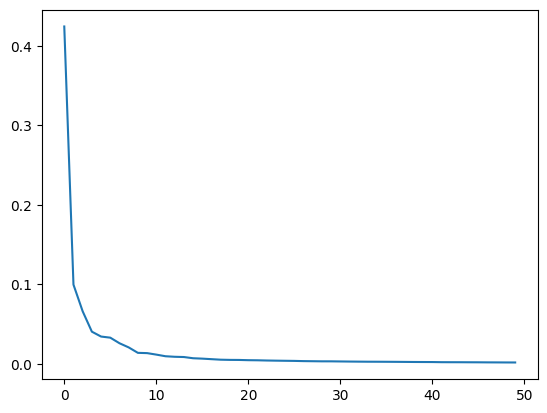

In [35]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

> 10개만 주성분으로 잡아도 문제 없을것 같아 보인다

In [22]:
pca10 = PCA(n_components=10)
pca10.fit(fruits_2d)

PCA(n_components=10)

In [23]:
pca10.components_.shape

(10, 10000)

In [25]:
print(fruits_2d.shape)
fruits_pca10 = pca10.transform(fruits_2d)
print(fruits_pca10.shape)

(300, 10000)
(300, 10)


In [27]:
# 원본 재구성
fruits_inverse_10 = pca10.inverse_transform(fruits_pca10)
fruits_inverse_10.shape # 다시 1만개로 복원

(300, 10000)

In [28]:
fruits_reconstruct_10 = fruits_inverse_10.reshape(-1,100,100)
fruits_reconstruct_10.shape

(300, 100, 100)

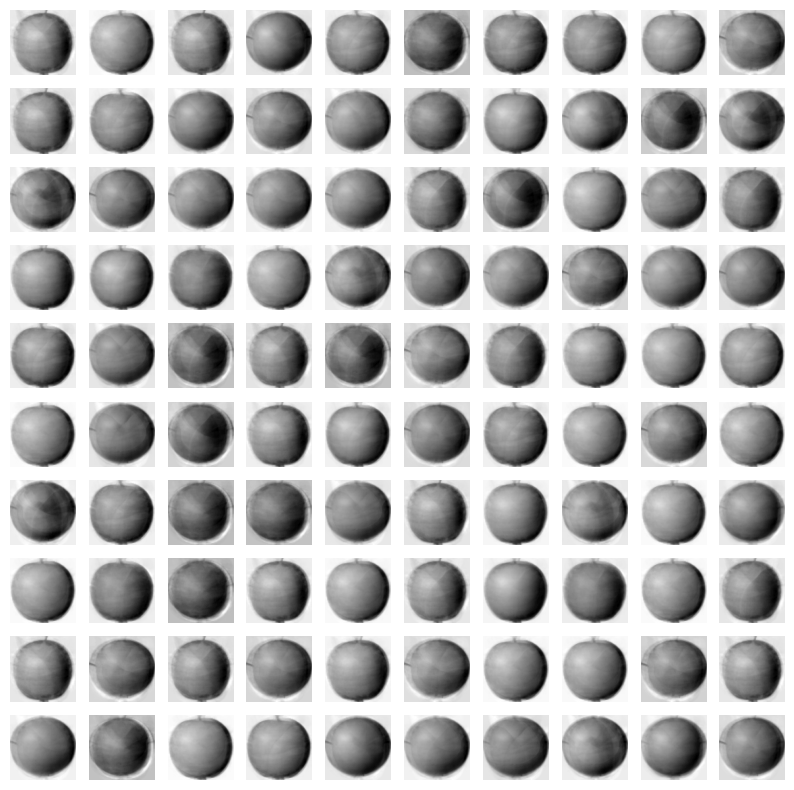

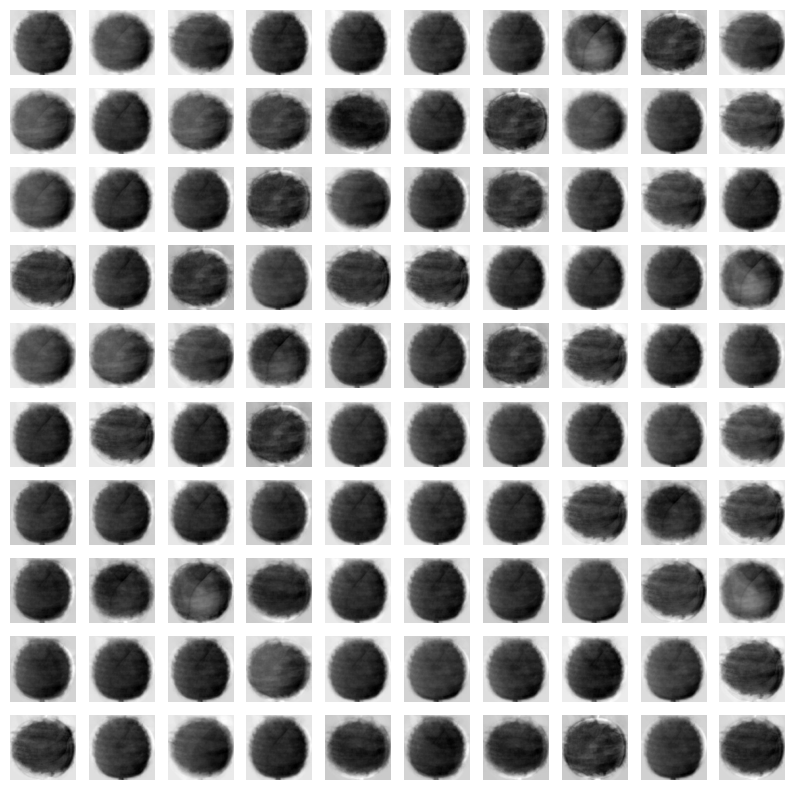

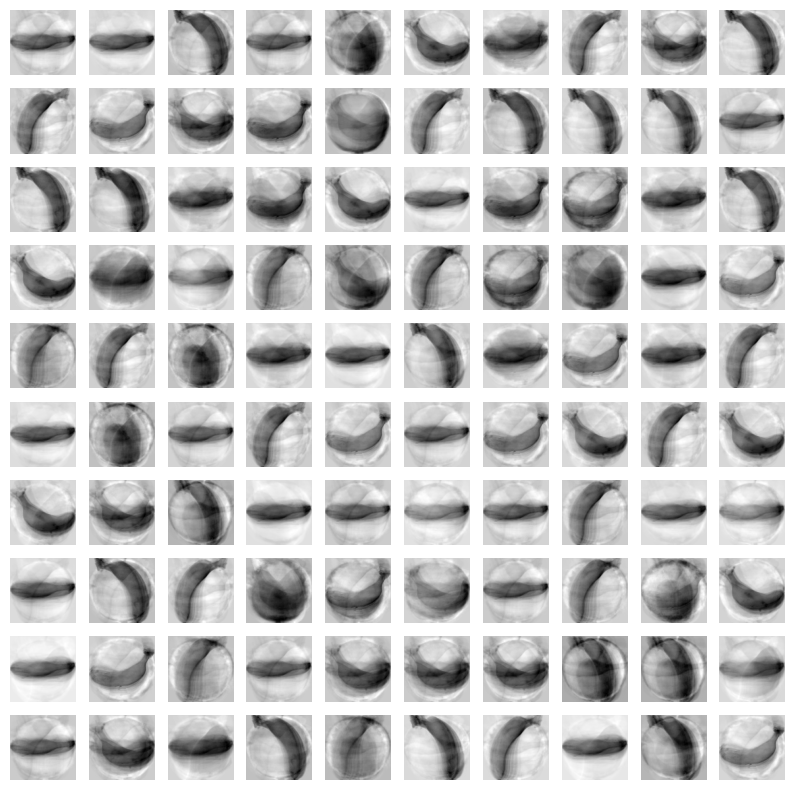

In [30]:
for start in [0,100,200]:
    draw_fruits(fruits_reconstruct_10[start:start+100])
    print("")

In [31]:
np.sum(pca10.explained_variance_ratio_)
# 약 77% 정도 복원됨 

0.7711096020919317

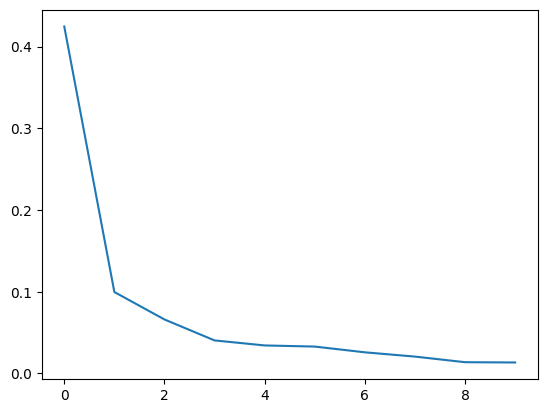

In [34]:
plt.plot(pca10.explained_variance_ratio_)
plt.show()

---
#### Logistic Regression 에 PCA를 대입하여 사용해보기

In [36]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [37]:
# LR 은 지도학습이므로 Target이 필요하다.
target = np.array([0]*100+[1]*100 + [2]*100)

In [40]:
# 교차검증을 통해 실시
from sklearn.model_selection import cross_validate

In [43]:
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.508092212677002


In [44]:
# 
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.006433248519897461


In [45]:
scores

{'fit_time': array([0.00867891, 0.00670624, 0.00497007, 0.00536799, 0.00644302]),
 'score_time': array([0.00031877, 0.00032783, 0.00025511, 0.00029302, 0.00026488]),
 'test_score': array([1., 1., 1., 1., 1.])}

In [46]:
# 
scores = cross_validate(lr, fruits_pca10, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.004977178573608398
